### Importing the *matplotlib* package to create plots

In [1]:
import matplotlib.pyplot as plt

Create a simple plot using the matplotlib library

Text(0, 0.5, 'Position (km)')

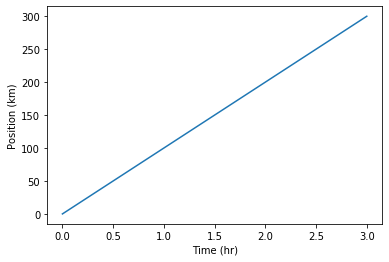

In [2]:
time = [0, 1, 2,3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

Getting details about the plot function

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

#### Plot data directly from a Pandas dataframe.

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('gapminder_gdp_oceania.csv', index_col='country')
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Extract year from last 4 characters of each column name  
The current column names are structured as 'gdpPercap_(year)',   
so we want to keep the (year) part only for clarity when plotting GDP vs. years  
To do this we use strip(), which removes from the string the characters stated in the argument  
This method works on strings, so we call str before strip()  

In [6]:
years = data.columns.str.strip('gdpPercap_')
years

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')

In [7]:
years = years.astype(int)
years

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')

In [8]:
data.columns = years
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


### Create plots with pandas

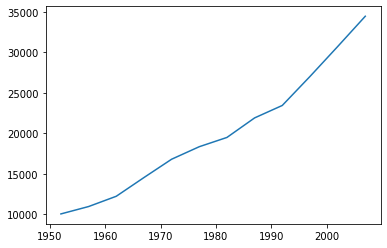

In [9]:
data.loc['Australia'].plot()

Text(0, 0.5, 'GDP per capita')

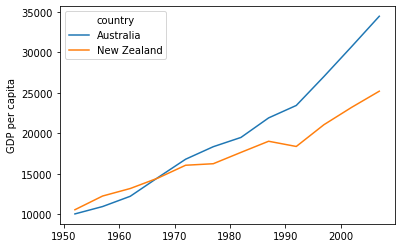

In [10]:
data.T.plot()
plt.ylabel('GDP per capita')

#### Creating a bar plot 

Text(0, 0.5, 'GDP per capita')

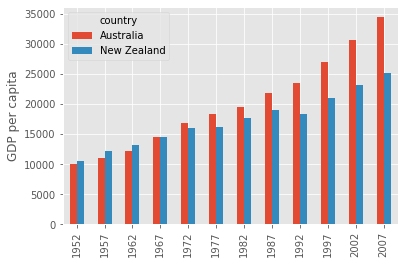

In [11]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

In [12]:
years

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')

#### Reproducing the same plots created with Pandas using matplotlib package

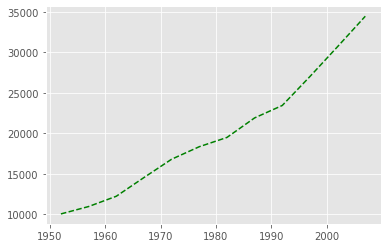

In [13]:
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')

Text(0, 0.5, 'GDP per capita ($)')

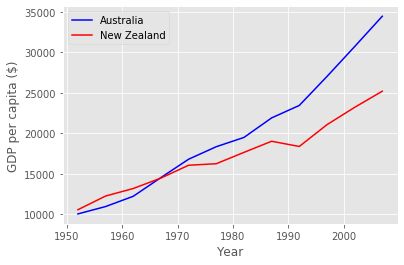

In [18]:
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

plt.plot(years, gdp_australia, 'b-',label='Australia' )
plt.plot(years, gdp_nz, 'r-', label='New Zealand')

plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

#### Create scatter plot with matplotlib or Pandas

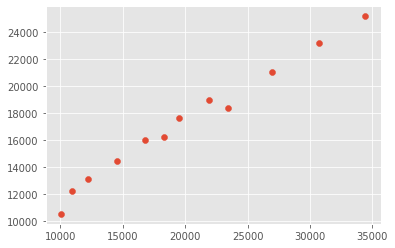

In [15]:
plt.scatter(gdp_australia, gdp_nz)

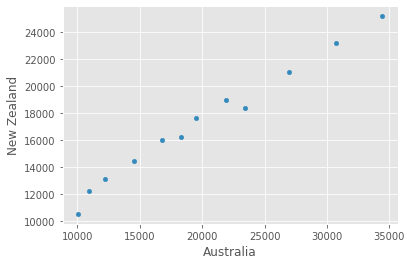

In [16]:
data.T.plot.scatter(x = 'Australia', y='New Zealand')